In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from keras import layers , models , datasets

In [3]:
(X_train , y_train) , (X_test , y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
len(X_train) , len(y_train) , len(X_test), len(y_test)

(50000, 50000, 10000, 10000)

In [5]:
X_train.shape , y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [6]:
y_train  = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_train[56]

5

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

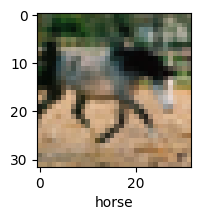

In [9]:
plot_sample(X_train,y_train,52)

In [10]:
X_train = X_train / 255
X_test  = X_test / 255

In [11]:
ann = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation="relu"),
    keras.layers.Dense(1000,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])


ann.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
ann.fit(X_train,y_train,epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.2727 - loss: 2.1948
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3906 - loss: 1.6980
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4271 - loss: 1.6046
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4464 - loss: 1.5420
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4620 - loss: 1.4896


In [12]:
ann.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4433 - loss: 1.5536


[1.5514109134674072, 0.4487000107765198]

In [20]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report \n",classification_report(y_test,y_pred_classes))

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification Report 
               precision    recall  f1-score   support

           0       0.40      0.64      0.49      1000
           1       0.66      0.47      0.55      1000
           2       0.32      0.22      0.26      1000
           3       0.35      0.26      0.30      1000
           4       0.41      0.44      0.42      1000
           5       0.36      0.37      0.37      1000
           6       0.56      0.33      0.41      1000
           7       0.45      0.60      0.51      1000
           8       0.50      0.67      0.57      1000
           9       0.55      0.48      0.52      1000

    accuracy                           0.45     10000
   macro avg       0.46      0.45      0.44     10000
weighted avg       0.46      0.45      0.44     10000

Classification Report: 
               precision    recall  f1-score   support

           0       0.40      0.64      0.49      1000
           1       0.66      0.47      0.5

# CNN

In [21]:
cnn = keras.Sequential([
    # Cnn
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    keras.layers.MaxPooling2D((2,2)),

    # Dense
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dense(32,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])


cnn.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
cnn.fit(X_train,y_train,epochs=10)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.3758 - loss: 1.6966
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6083 - loss: 1.1216
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6609 - loss: 0.9643
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6933 - loss: 0.8748
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7273 - loss: 0.7807
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7395 - loss: 0.7449
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7595 - loss: 0.6923
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7811 - loss: 0.6324
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7930 - loss: 0.5879
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8067 - loss: 0.5522


In [22]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6966 - loss: 0.9367


[0.9502281546592712, 0.6944000124931335]

In [23]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred_cnn = cnn.predict(X_test)
y_pred_cnn_classes = [np.argmax(element) for element in y_pred_cnn]
print("Classification Report \n",classification_report(y_test,y_pred_cnn_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report 
               precision    recall  f1-score   support

           0       0.79      0.69      0.74      1000
           1       0.75      0.85      0.80      1000
           2       0.58      0.61      0.60      1000
           3       0.58      0.41      0.48      1000
           4       0.54      0.78      0.64      1000
           5       0.61      0.62      0.61      1000
           6       0.73      0.78      0.76      1000
           7       0.81      0.68      0.74      1000
           8       0.80      0.81      0.81      1000
           9       0.82      0.71      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



In [25]:
y_test = y_test.reshape(-1,)

In [35]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

In [36]:
y_pred_cnn_classes[:10]

[3, 8, 8, 0, 4, 6, 1, 2, 3, 1]

In [38]:
classes[1]

'automobile'

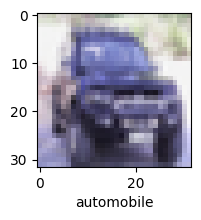

In [37]:
plot_sample(X_test,y_test,9)